In [1]:
# - Title -
# Exploring Week-to-Week Passing Statistics Throughout the 2023 Season

# - Goal -
# The objective of my data analytics project is to analyze quarterback gamelogs on a weekly basis throughout the 2023 season. 
# The primary goals include identifying the top-performing players each week and recognizing players with positive performance trends. 
# With these insights, I aim to make predictions for the top-performing players in the upcoming 2024 season.

# - Dataset -
# 'all_qb_df.csv' - Passer dataset

# - Important findings -


# - Next steps -


In [2]:
# - What am I doing? -
# Importing in Python libraries (pandas, matplotlib, and seaborn) for data exploration.

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# chained_assignment warning when working on slices of dataframes
pd.options.mode.chained_assignment = None

# Print success if libraries imported properly.
print("Success!")

Success!


In [3]:
# - What am I doing? -
# Read in data and remove [Unnamed: 0] column.

# 1. Read in data for NFL Player Statistics.
QuarterbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/all_qb_df.csv')

# 2. Create list of dataframes to iterate through.
files = [QuarterbackWeektoWeek2023]

# 3. Removed unnamed index column.
for i in range(len(files)):
    files[i].drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [4]:
# - What am I doing? -
# Change QBR datatype from object to integer.

# 1. Remove the object elements from [QBR] column.
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'.', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'-', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'', '')

# 2. Convert QBR dtype from object to numeric.
QuarterbackWeektoWeek2023['QBR'] = pd.to_numeric(QuarterbackWeektoWeek2023['QBR'], errors='coerce')

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [5]:
# - What am I doing? -
# I want to look at players that have had their reps in regular season game. To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.groupby('playerName')['ATT'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_QuarterbackWeektoWeek2023.loc[grouped_QuarterbackWeektoWeek2023['ATT'] >= 100, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [6]:
# - What am I doing? -
# Get high level information (datatypes, rows/columns, and nulls) about week to week gamelogs for the top passers of 2023 season.

# 1. Call info function on 'Passer' dataset
QuarterbackWeektoWeek2023.info()

# Print success if data is imported and unnamed index column is removed.
print("Success!")

# - Comments - 
# Rows: 711
# Columns: 20
# Null columns: 8 rows in [QBR] column
# dtypes: object, float, and int

# - Questions -
# What are the missing rows in [QBR] column?

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        479 non-null    object 
 1   Opponent    479 non-null    object 
 2   Result      479 non-null    object 
 3   CMP         479 non-null    int64  
 4   ATT         479 non-null    int64  
 5   PASS_YDS    479 non-null    int64  
 6   CMP%        479 non-null    float64
 7   PASS_AVG    479 non-null    float64
 8   PASS_TD     479 non-null    int64  
 9   INT         479 non-null    int64  
 10  PASS_LNG    479 non-null    int64  
 11  SACK        479 non-null    int64  
 12  RTG         479 non-null    float64
 13  QBR         479 non-null    float64
 14  RUSH_CAR    479 non-null    int64  
 15  RUSH_YDS    479 non-null    int64  
 16  RUSH_AVG    479 non-null    float64
 17  RUSH_TD     479 non-null    int64  
 18  LNG_RUSH    479 non-null    int64  
 19  playerName  479 non-null    object

In [7]:
# - What am I doing? -
# For [Date] column, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
QuarterbackWeektoWeek2023[['Day of the week', 'MonthYear']] = QuarterbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
QuarterbackWeektoWeek2023[['Month', 'Day']] = QuarterbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
QuarterbackWeektoWeek2023['Month'] = QuarterbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] > 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/23'
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] < 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [8]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column

# 1. Split [Score] column into score and result of game (W/L).
QuarterbackWeektoWeek2023['Score'] = QuarterbackWeektoWeek2023['Result'].str[1:]
QuarterbackWeektoWeek2023['Game Result'] = QuarterbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
QuarterbackWeektoWeek2023[['Winner Score', 'Loser Score']] = QuarterbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
QuarterbackWeektoWeek2023['Winner Score'] = QuarterbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
QuarterbackWeektoWeek2023[['Loser Score', 'OT?']] = QuarterbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
QuarterbackWeektoWeek2023['Loser Score'] = QuarterbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [9]:
# - What am I doing? -
# Looking at [Opponent] column to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
QuarterbackWeektoWeek2023['Home/Away'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
QuarterbackWeektoWeek2023['Opponent'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [10]:
# - What am I doing? -
# Converting percentage to a decimal for calculation reasons.

# 1. Divide integer by 100 to convert percentage to decimal.
QuarterbackWeektoWeek2023['CMP%'] = QuarterbackWeektoWeek2023['CMP%'] / 100

# Print success if percentage is converted to decimal.
print("Success!")

Success!


In [11]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).


# 1. Call info function on 'Passer' dataset
QuarterbackWeektoWeek2023.select_dtypes(include='float64')

# - Comments -


# - Questions -
# dtype: objects
# Should [Winner Score] and [Loser Score] columns be integers?

# dtype: int64
# No comments

# dtype: float64
# For [CMP%] column, decimal has not moved two decimal places to left to convert from percentage to decimal. 

,CMP%,PASS_AVG,RTG,QBR,RUSH_AVG
0,0.649,7.9,98.1,655.0,-1.0
1,0.697,7.3,90.5,284.0,5.0
2,0.700,8.1,77.5,382.0,0.5
3,0.719,6.8,87.5,333.0,-3.0
4,0.733,10.3,100.4,646.0,3.0
...,...,...,...,...,...
488,0.558,3.8,54.9,338.0,6.7
489,0.528,3.4,25.3,243.0,6.0
490,1.000,5.0,87.5,1000.0,0.0
491,0.483,4.6,73.1,380.0,4.2


In [12]:
# - What am I doing? -
# Generate descriptive statistics to learn about 'Passer' dataset.

# 1. Call describe function on 'Passer' dataset.
QuarterbackWeektoWeek2023.describe()

# - Comments -
# Somebody got a 100 for [CMP%] column. Is this because the person has very few passes?

# - Questions -
# What are the missing rows in [QBR] column?
# How can there be data for top passers but have a game with 0 completions? Is this skewing results?
# Who got a 1000 for [QBR] column?


,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,Winner Score,Loser Score
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,20.231733,31.392484,220.127349,0.636695,6.894781,1.292276,0.701461,35.862213,2.384134,87.954697,503.977035,3.759916,16.223382,3.644468,0.196242,8.223382,27.594990,16.281837
std,7.053780,9.891484,86.118718,0.122724,2.100765,1.094950,0.856075,14.982200,1.802671,26.589680,254.458753,3.039279,19.118388,3.653170,0.456366,7.582889,8.520886,7.968945
min,0.000000,0.000000,-1.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,-6.000000,-5.000000,0.000000,-5.000000,3.000000,0.000000
25%,16.000000,26.000000,169.000000,0.576000,5.650000,0.000000,0.000000,26.000000,1.000000,68.900000,286.500000,2.000000,2.000000,0.800000,0.000000,2.000000,21.000000,10.000000
50%,21.000000,32.000000,227.000000,0.644000,6.900000,1.000000,1.000000,33.000000,2.000000,87.300000,511.000000,3.000000,10.000000,3.300000,0.000000,7.000000,27.000000,17.000000
75%,25.000000,38.000000,278.500000,0.705000,8.100000,2.000000,1.000000,44.000000,3.000000,106.900000,718.000000,5.000000,25.000000,5.950000,0.000000,12.000000,33.000000,20.000000
max,40.000000,55.000000,470.000000,1.000000,13.600000,5.000000,4.000000,81.000000,10.000000,158.300000,1000.000000,18.000000,104.000000,21.000000,2.000000,44.000000,70.000000,38.000000


In [13]:
# - What am I doing? -
# Looking at null values of columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.isnull().sum()

Date              0
Opponent          0
CMP               0
ATT               0
PASS_YDS          0
CMP%              0
PASS_AVG          0
PASS_TD           0
INT               0
PASS_LNG          0
SACK              0
RTG               0
QBR               0
RUSH_CAR          0
RUSH_YDS          0
RUSH_AVG          0
RUSH_TD           0
LNG_RUSH          0
playerName        0
Game Result       0
Winner Score      0
Loser Score       0
OT?             455
Home/Away         0
dtype: int64

In [14]:
# - What am I doing? -
# Showing how many unique values are in columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.nunique()

Date             51
Opponent         32
CMP              39
ATT              53
PASS_YDS        242
CMP%            198
PASS_AVG         94
PASS_TD           6
INT               5
PASS_LNG         73
SACK             11
RTG             370
QBR             372
RUSH_CAR         17
RUSH_YDS         75
RUSH_AVG        115
RUSH_TD           3
LNG_RUSH         40
playerName       45
Game Result       2
Winner Score     41
Loser Score      33
OT?               1
Home/Away         2
dtype: int64

In [15]:
# - What am I doing? -
# Look at sorted data for quarterback week to week.

# Don't put cap on number of columns shown.
pd.options.display.max_columns = None

# Sort data by column name
QuarterbackWeektoWeek2023.sort_values(by='RUSH_TD', ascending=False).head(20)

,Date,Opponent,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away
116,2023-11-26,BUF,18,31,200,0.581,6.5,3,1,33,2,96.2,569.0,14,65,4.6,2,16,Jalen Hurts,W,37,34,OT,Home
143,2023-12-03,MIA,12,23,127,0.522,5.5,0,1,33,3,50.5,201.0,4,21,5.3,2,13,Sam Howell,L,45,15,None,Home
124,2023-11-20,KC,14,22,150,0.636,6.8,0,1,41,5,64.6,326.0,12,29,2.4,2,10,Jalen Hurts,W,21,17,None,Away
128,2023-09-14,MIN,18,23,193,0.783,8.4,1,1,63,4,98.0,425.0,12,35,2.9,2,8,Jalen Hurts,W,34,28,None,Home
96,2023-11-19,TEN,24,32,262,0.750,8.2,2,0,34,1,119.5,905.0,5,17,3.4,2,9,Trevor Lawrence,W,34,14,None,Home
73,2023-12-23,LAC,15,21,237,0.714,11.3,1,1,57,1,104.7,907.0,5,15,3.0,2,6,Josh Allen,W,24,22,None,Away
122,2023-12-18,SEA,17,31,143,0.548,4.6,0,2,18,0,40.1,569.0,13,82,6.3,2,20,Jalen Hurts,L,20,17,None,Away
81,2023-11-26,PHI,29,51,339,0.569,6.6,2,1,31,1,82.1,818.0,9,81,9.0,2,19,Josh Allen,L,37,34,OT,Away
208,2023-09-24,IND,22,31,202,0.710,6.5,0,0,24,4,88.4,623.0,14,101,7.2,2,16,Lamar Jackson,L,22,19,OT,Home
214,2023-10-01,CLE,15,19,186,0.790,9.8,2,0,43,3,142.5,664.0,9,27,3.0,2,10,Lamar Jackson,W,28,3,None,Away


In [16]:
# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Looking at correlations between numeric values.
Correlation_QuarterbackWeektoWeek2023.corr()

,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,Winner Score,Loser Score
CMP,1.000000,0.912125,0.835335,0.499973,0.357493,0.421078,0.111951,0.328083,0.099268,0.394817,0.370641,0.073154,0.051212,0.075126,-0.019355,0.101622,0.079323,0.235280
ATT,0.912125,1.000000,0.762517,0.203405,0.179617,0.304816,0.222136,0.300714,0.148627,0.139078,0.189171,0.081428,0.076189,0.102106,-0.030538,0.112627,0.013606,0.212033
PASS_YDS,0.835335,0.762517,1.000000,0.436751,0.713532,0.568322,0.092741,0.600033,0.005614,0.558730,0.496478,0.067193,0.020248,0.032044,0.053977,0.072441,0.209128,0.353676
CMP%,0.499973,0.203405,0.436751,1.000000,0.615515,0.331511,-0.118313,0.262423,-0.001626,0.682041,0.484049,0.062409,0.019015,0.007648,0.050601,0.054829,0.096880,0.060645
PASS_AVG,0.357493,0.179617,0.713532,0.615515,1.000000,0.512892,-0.049726,0.657435,-0.070733,0.749216,0.557631,0.078114,0.002295,-0.011198,0.145964,0.036859,0.259571,0.245622
PASS_TD,0.421078,0.304816,0.568322,0.331511,0.512892,1.000000,-0.098658,0.383256,-0.154510,0.725177,0.546607,0.012329,-0.027510,-0.050013,-0.056410,-0.000321,0.402201,0.384226
INT,0.111951,0.222136,0.092741,-0.118313,-0.049726,-0.098658,1.000000,0.089434,0.131404,-0.507728,-0.318253,0.023855,0.074258,0.101585,0.037819,0.036399,-0.038120,-0.022600
PASS_LNG,0.328083,0.300714,0.600033,0.262423,0.657435,0.383256,0.089434,1.000000,-0.042111,0.416350,0.322399,0.073104,0.045902,0.045529,0.085658,0.085107,0.140150,0.186239
SACK,0.099268,0.148627,0.005614,-0.001626,-0.070733,-0.154510,0.131404,-0.042111,1.000000,-0.143061,-0.411157,0.074908,0.118727,0.158939,-0.038421,0.124104,-0.115289,-0.130319
RTG,0.394817,0.139078,0.558730,0.682041,0.749216,0.725177,-0.507728,0.416350,-0.143061,1.000000,0.693560,0.048093,-0.031401,-0.056714,0.031301,0.022106,0.290759,0.256306


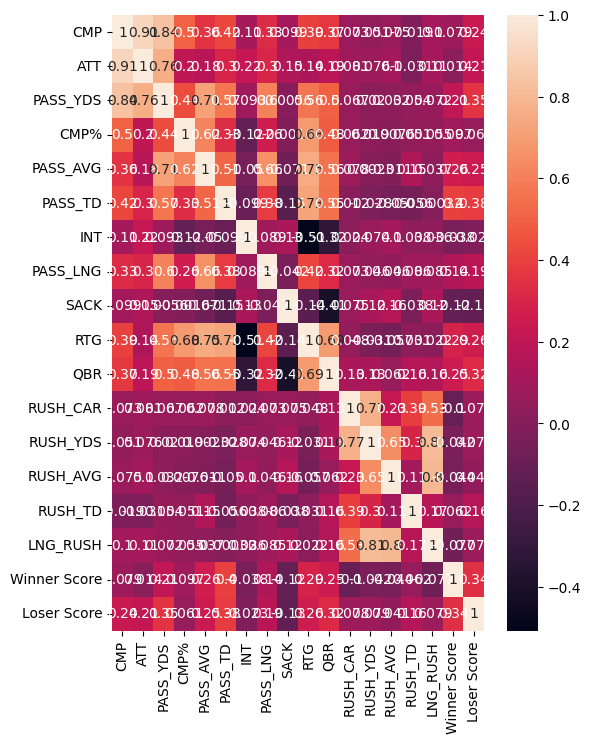

In [32]:
# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (10, 8)

plt.show()

In [18]:
# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='PASS_YDS', ascending=False).head(50)

,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,Winner Score,Loser Score
playerName,,,,,,,,,,,,,,,,,,
Brock Purdy,286,416,4050,10.407,148.3,29,11,658,28,1668.4,10489.0,38,140,37.5,2,93,479,232
Tua Tagovailoa,328,461,4021,10.106,124.1,25,10,629,23,1494.8,8458.0,30,46,14.1,0,42,492,250
Jared Goff,365,539,3984,10.177,112.5,27,10,539,28,1486.7,8857.0,32,21,8.7,2,29,472,295
Dak Prescott,353,516,3892,10.210,113.2,30,7,523,36,1536.9,10326.0,53,237,70.4,2,138,523,214
Patrick Mahomes,360,538,3753,9.386,98.3,24,14,523,23,1274.1,8807.0,65,363,73.8,0,167,349,214
Matthew Stafford,302,487,3648,8.664,106.5,23,9,580,26,1309.1,8598.0,20,66,38.5,0,50,409,257
Jalen Hurts,327,499,3636,9.914,110.0,20,13,582,34,1353.5,8665.0,147,576,57.8,15,187,444,314
C.J. Stroud,275,441,3631,7.978,105.4,20,5,540,35,1261.3,6969.0,35,143,35.8,3,88,345,221
Sam Howell,352,557,3624,9.122,93.6,19,17,481,60,1152.7,6186.0,43,265,98.2,5,182,470,292


In [19]:
# Look at single player stats
Helloworld = QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['playerName'] == 'Tua Tagovailoa']
Helloworld

,Date,Opponent,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away
0,2023-12-24,DAL,24,37,293,0.649,7.9,1,0,50,1,98.1,655.0,2,-2,-1.0,0,-1,Tua Tagovailoa,W,22,20,None,Home
1,2023-12-11,TEN,23,33,240,0.697,7.3,0,0,25,5,90.5,284.0,3,15,5.0,0,8,Tua Tagovailoa,L,28,27,None,Home
2,2023-11-24,NYJ,21,30,243,0.700,8.1,1,2,35,2,77.5,382.0,2,1,0.5,0,1,Tua Tagovailoa,W,34,13,None,Away
3,2023-10-22,PHI,23,32,216,0.719,6.8,1,1,29,3,87.5,333.0,1,-3,-3.0,0,-3,Tua Tagovailoa,L,31,17,None,Away
4,2023-10-08,NYG,22,30,308,0.733,10.3,2,2,69,1,100.4,646.0,2,6,3.0,0,7,Tua Tagovailoa,W,31,16,None,Home
5,2023-09-24,DEN,23,26,309,0.885,11.9,4,0,54,0,155.8,897.0,0,0,0.0,0,0,Tua Tagovailoa,W,70,20,None,Home
6,2023-09-10,LAC,28,45,466,0.622,10.4,3,1,47,0,110.0,851.0,5,5,1.0,0,7,Tua Tagovailoa,W,36,34,None,Away
7,2023-12-17,NYJ,21,24,224,0.875,9.3,1,0,60,3,119.4,572.0,0,0,0.0,0,0,Tua Tagovailoa,W,30,0,None,Home
8,2023-12-03,WSH,18,24,280,0.750,11.7,2,0,78,0,141.0,906.0,0,0,0.0,0,0,Tua Tagovailoa,W,45,15,None,Away
9,2023-11-19,LV,28,39,325,0.718,8.3,2,1,38,1,103.0,411.0,2,6,3.0,0,7,Tua Tagovailoa,W,20,13,None,Home


<Axes: >

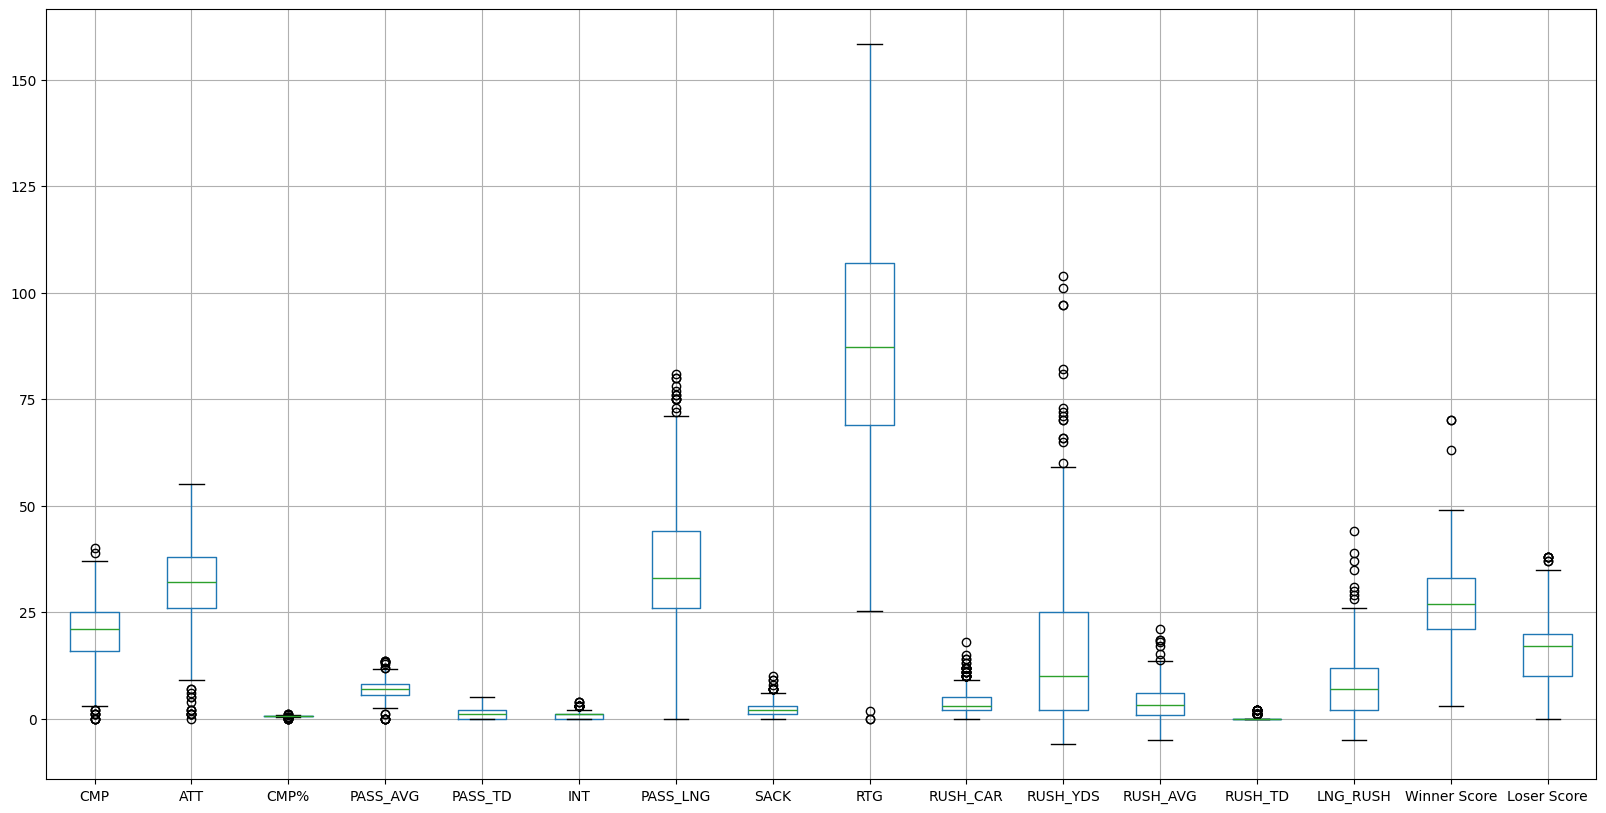

In [20]:
BP_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['QBR', 'PASS_YDS'])

# Look at boxplots to find outliers.
BP_QuarterbackWeektoWeek2023.boxplot(figsize=(20,10))

In [21]:
QuarterbackWeektoWeek2023.to_csv('PasserGamelog.csv')